In [1]:
from carbon.helpers.stdimports import *
from carbon.helpers.pdread import *
from carbon.helpers.strategy import *
from carbon.helpers.fls import *
from carbon.helpers.version import VersionTooLowError

from carbon.helpers.simulation import run_sim, plot_sim

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [12,6]


[stdimports] Carbon v2.3-BETA0 (21/Jan/2022)
[stdimports] CarbonSimulatorUI v2.4 (12/Jan/2023)
[stdimports] CarbonOrderUI v1.6.1 (21/Jan/2023)


# Carbon Helpers (NBTest 052)

Based on the Demo 7-3 notebook

## helpers stdimport

check that the following objects have been imported

In [50]:
np
plt
pd
CarbonSimulatorUI
CarbonOrderUI
P

carbon.pair.CarbonPair

In [51]:
sqrt
exp
log

<function math.log>

## helpers version

In [2]:
assert require_version("1.0", "1.0", raiseonfail=False) == True
assert require_version("2.0", "1.0", raiseonfail=False) == False
assert require_version("1.0", "2.0", raiseonfail=False) == True
assert require_version("1.0.1", "1.0", raiseonfail=False) == False
assert require_version("1.0", "1.0.1", raiseonfail=False) == True
assert require_version("1.0", "11.0", raiseonfail=False) == True
assert require_version("11.0", "1.0", raiseonfail=False) == False
assert require_version("1.3beta1", "1.3", raiseonfail=False) == True
assert require_version("1.3beta1", "1.3beta1", raiseonfail=False) == True
assert require_version("1.3-1", "1.3-2", raiseonfail=False) == True
assert require_version("1.3-2", "1.3-1", raiseonfail=False) == True
assert require_version("1.0", "1.0", raiseonfail=False) == True
assert require_version("1.0", "1.0", raiseonfail=False) == True

obviously must be tested with version >= 2.0

In [3]:
require_version("2.0")

In [4]:
require_version("1.0", "1.0")

In [5]:
try:
    require_version("2.0", "1.0")
    run("must raise error")
except VersionTooLowError as e:
    print(e)

('Version requirements not met (required = [2, 0], actual = [1, 0])', '2.0', '1.0')


## helpers strategy

In [46]:
# from carbon.helpers import strategy as _strategy
# help(_strategy)

In [8]:
assert strategy.from_mgw() == strategy(p_buy_a=100.0, p_buy_b=100.0, p_sell_a=100, p_sell_b=100, 
                                       amt_rsk=0, amt_csh=0, rsk='RSK', csh='CSH')

In [9]:
# DEPRECATED
assert strategy.from_mgw() == strategy.from_mwh()

In [21]:
assert strategy.from_mgw(m=100) == strategy.from_mgw()
assert strategy.from_mgw(g=0) == strategy.from_mgw()
assert strategy.from_mgw(w=0) == strategy.from_mgw()

In [38]:
assert strategy.from_mgw(g=0.1).p_buy_a == 100/(1.1)
assert strategy.from_mgw(g=0.1).p_sell_a == 100*(1.1)
assert strategy.from_mgw(g=0.1).p_buy_b == strategy.from_mgw(g=0.1).p_buy_a
assert strategy.from_mgw(g=0.1).p_sell_b == strategy.from_mgw(g=0.1).p_sell_a

In [43]:
assert strategy.from_mgw(w=0.1).p_buy_a == strategy.from_mgw(w=0.1).p_sell_a
assert strategy.from_mgw(w=0.1).p_buy_b == 100/1.1
assert strategy.from_mgw(w=0.1).p_sell_b == 100*1.1

In [45]:
assert strategy.from_mgw().slashpair == "RSK/CSH"
assert strategy.from_mgw(rsk="ETH", csh="USD").slashpair == "ETH/USD"

## helpers pdread

In [10]:
# from carbon.helpers import pdread as _pdread
# help(_pdread)

In [11]:
DATAFN = "resources/data/RANPTH-05000-0000.pickle"
#DATAFN = "../data/RANPTH-05000-0000.pickle"

In [12]:
assert len(pdread(DATAFN))==101
assert pdread(DATAFN).iloc[0].index[5] == "p0005"
assert str(pdread(DATAFN).index[0]) == '2020-01-01 00:00:00'
assert len(pdread(DATAFN)["p0000"]) == len(pdread(DATAFN))
assert list(pdread(DATAFN)["p0000"]) == list(pdread(DATAFN, "p0000"))

In [13]:
assert pathtime(pdread(DATAFN, "p0000")) == 1

In [14]:
assert len(pdcols(DATAFN)) == 1000
assert (pdcols(DATAFN) == pdread(DATAFN).columns).all() == True

## demo 7 3

In [15]:
DATAID = "RANPTH-05000-0000"

DATAPATH = "resources/data"
#DATAPATH = "../data"           # uncomment to run this as Jupyter notebook

DATAFN = j(DATAPATH, f"{DATAID}.pickle")
print(f"Chose data id {DATAID}")

Chose data id RANPTH-05000-0000


In [16]:
strats = (
    strategy.from_mgw(m=100, g=0.10, w=0.05, amt_rsk=1, amt_csh=0),
)

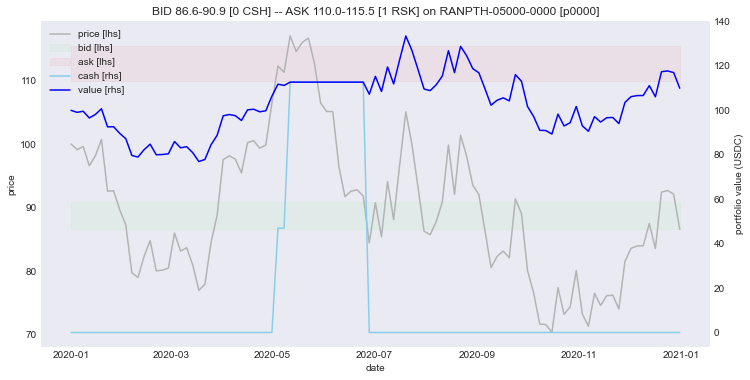

In [17]:
for colnm in ["p0000"]:
    for ix, strat in enumerate(strats):
    
        path = pdread(DATAFN, colnm)
        simresults = run_sim(strat, path)
        if DATAPATH == "../data":
            plot_sim(strat, path, simresults, f"{DATAID} [{colnm}]")
            plt.show()

In [18]:
assert simresults.rskamt_r[0] == 1
assert round(simresults.rskamt_r[35] - 0.57736478, 5) == 0
assert simresults.cshamt_r[0] == 0
assert round(simresults.cshamt_r[36] - 112.7164584255556, 5) == 0
assert round(simresults.value_r[4] - 98.135103, 5) == 0
assert round(simresults.value_r[-1] - 109.973544, 5) == 0
assert str(simresults.value_r.index[0]) == '2020-01-01 00:00:00'
assert str(simresults.value_r.index[-1]) == '2020-12-31 06:00:00'